## BST

Nel prossimo esercizio, implementeremo un algoritmo su Binary Search Tree (https://en.wikipedia.org/wiki/Binary_search_tree). La definizione del tipo algebrico `binary_tree` è già data.

**Reminder**: Un BST è tale se e solo se, per ogni nodo $s$, nel sottoalbero sinistro di $s$ ci sono solo valori $\leq s$, e nel sottoalbero destro di $s$ ci sono solo valori $> s$.



In [5]:
type binary_tree =
    | Empty
    | Node of int *  binary_tree * binary_tree;;
    
(*Esempio: t1 è un BST*)
let t1 = Node(5, Node(3, Empty, Empty), Node(7, Node(6, Empty, Empty), Empty))

(*Esempio: t2 non è un BST*)
let t2 = Node(5, Node(8, Empty, Empty), Node(7, Node(6, Empty, Empty), Empty))

type binary_tree = Empty | Node of int * binary_tree * binary_tree


val t1 : binary_tree =
  Node (5, Node (3, Empty, Empty), Node (7, Node (6, Empty, Empty), Empty))


val t2 : binary_tree =
  Node (5, Node (8, Empty, Empty), Node (7, Node (6, Empty, Empty), Empty))


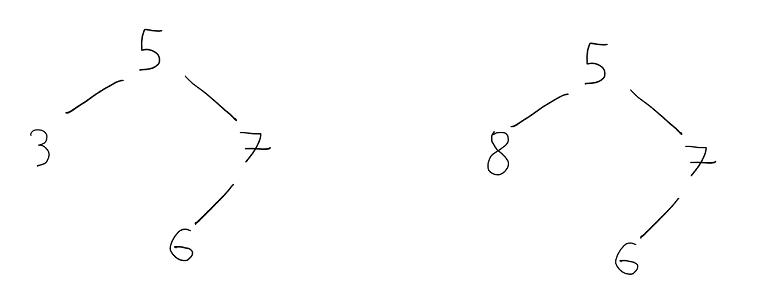

### Es. 1:

Scrivere una funzione `insert tree n` che prende un BST  e un intero, e restituisce il BST in cui è stato aggiunto quell'intero.

    let t = Node(5, Node(3, Empty, Empty), Node(7, Empty, Empty)) in
    insert t 6;;

    Output: Node(5, Node(3, Empty, Empty), Node(7, Node(6, Empty, Empty), Empty))

### Soluzione: 

La funzione `insert` si aspetta in input un `binary_tree`, ovvero un valore che è **o** `Empty` **o** un `Node` con 2 sottoalberi.  `insert` deve quindi dare la risposta corretta in entrambi questi casi, che può distinguere facendo pattern matchig su `tree`.

Notiamo inoltre che *tutti* gli alberi possibili sono costruiti usando solo `Empty` e `Node`, quindi una funzione che è corretta sia su un albero `Empty` che su un albero `Node (x, left, right) ` è corretta su tutti gli alberi possibili. In altre parole, la definizione del tipo `binary_tree` ci dice come strutturare `insert` (o qualsiasi altro algoritmo su binary tree): quelli che sono i casi possibili di `binary_tree` diventano pattern di un costrutto match dentro `insert`. Infine notiamo anche che `binary_tree` è un tipo ricorsivo, cioè un binary tree può essere composto da altri binary tree (i sottoalberi). Questo ci dice anche che `insert` (e qualsiasi altro algoritmo su binary tree) sarà probabilmente ricorsivo, perchè per risolvere un problema su un albero si richiama ricorsivamente sui sottoalberi.

Procediamo quindi per casi. Se `tree` è `Empty`, dobbiamo semplicemente restuire un albero che contiene solo `n`, e per costruire un albero non vuoto dobbiamo usare il costruttore `Node`, ovvero dobbiamo restituire `Node(n, Empty, Empty)`
Se `tree` è non vuoto, l'approccio che dobbiamo seguire è un approccio *divide et impera*:
- Dividere il problema (inserire `n` in un albero) in sottoproblemi (inserire `n` nel sottoalbero sinistro o in quello destro)
- Risolvere ricorsivamente il sottoproblema ( chiama `insert` sul sottolabero)
- Ricombinare la soluzione del sottoproblema per ottenere la soluzione del problema originario

Ma come si ricombina la soluzione? Cioè, come dico a OCaml che voglio modificare solo il ramo sinistro dell'albero `tree`? OCaml non è (per adesso) un linguaggio imperativo, non possiamo dirgli di *eseguire* una modifica a uno stato. Quello che possiamo fare è *costruire* un nuovo albero, che sarà identico a quello di input, ma conterà il ramo `insert left n` al posto del ramo `left`. In altre parole, dobbiamo seguire un paradigma di programmazione *dichiarativo*: non diciamo all'interprete che comandi eseguire, cioè non gli diciamo *come* ottenere il risultato, ma gli diciamo *cosa* è il risultato. Sarà poi l'interprete a preoccuparsi di allocare memoria creare puntatori e modificare le strutture dati.



In [6]:
let rec insert tree n = 
    match tree with 
    | Empty -> Node(n, Empty, Empty)
    | Node (x, left, right) -> if n <= x 
                                then Node (x, (insert left n), right)
                                else Node (x, left, (insert right n));;
    
    let t = Node(5, Node(3, Empty, Empty), Node(7, Empty, Empty)) in
    insert t 6;;

val insert : binary_tree -> int -> binary_tree = <fun>


- : binary_tree =
Node (5, Node (3, Empty, Empty), Node (7, Node (6, Empty, Empty), Empty))


### Takeaway:
- Un algoritmo su alberi usa come pattern esattamente i costruttori presenti nella definizione del tipo "albero". Allo stesso modo, un algoitmo su liste usa come pattern `[]` e `x::xs` perchè il tipo lista è definito con due costruttori, `[]` che non prende nessun argomento, e `::` che prende un elemento e una lista. Questo vale per liste, alberi e qualsiasi altro tipo somma.
- OCaml segue un paradigma dichiarativo, quindi il programamtore deve specificare solo qual è il risultato atteso, da cosa è composto, mentre in un paradigma imperativo il programmatore specifica quali sono i passaggi per ottenere il risultato.
- Quando leggiamo `Node(x, Empty, Empty)` lo si potrebbe intendere come "passo `x` e due alberi vuoti alla *funzione* `Node`". Non è sbagliato, ma sarebbe meglio intenderlo direttamente come un *valore*, come "albero che contiene `x` e due alberi vuoti". Lo stesso succede in matematica, quando leggo $sen(\pi / 2)$ indendo il valore $1$, non una chiamata alla funzione divisione e alla funzione seno. 

## Interprete per espressioni aritmetiche

Si consideri il seguente interprete big step delle espressioni aritmetiche. 
La sintassi concreta è 

    Exp ::= N | Exp op Exp 
    op  ::= + | - | * | / 
    N   ::= 0 | 1 | 2 |...
   

In [2]:
"2 + 3*5"  -> Op(Add, Val(2), Op(Mul, Val(3), Val(5)))

(*Sintassi astratta*)
type op = Add | Sub | Mul | Div ;;
type exp = 
    | Val of int
    | Op of op*exp*exp

(*Semantica*)
let rec eval e =
    match e with
    | Val n -> Val n
    | Op (op,e1,e2) -> 
        (* chiamate ricorsive che calcolano le derivazioni per e1 ed e2 *)
        let v1 = eval e1 in
        let v2 = eval e2 in
        match (v1, v2) with (*Pattern matching per estrarre l'intero da dentro l'espressione*)
        | (Val n1, Val n2) -> (match op with   (* calcola n1 op n2 *)
                               | Add -> Val (n1+n2)
                               | Sub -> Val (n1-n2)
                               | Mul -> Val (n1*n2)
                               | Div -> Val (n1/n2)
                               )
        (* caso (inutile) aggiunto solo per rendere esaustivo il pattern matching *)
        | _ -> failwith "Errore impossibile che si verifichi" 

type op = Add | Sub | Mul | Div


type exp = Val of int | Op of op * exp * exp


val eval : exp -> exp = <fun>


### Es 2: 

Estendere la definizione dell'AST (modificando il codice qui sotto) in modo che possa descrivere identificatori `Ide` e un costrutto `sumall (x;n1;n2) {e}`, tali che la sintassi del linguaggio diventi

    Exp ::= N | Ide | Exp op Exp | sumall ( Ide ; n ; n ){Exp}
    op  ::= + | - | * | / 
    N   ::= 0 | 1 | 2 | ...
    Ide ::= x | y | z | ...
e scrivere l'AST che corrisponde all'espressione `sumall (k, 1, 5){k-1}`, o come scriverebbero i matematici $$\sum_{k=1}^5 k-1$$

### Soluzione

"Estendere la sintassi" vuol dire estendere la definizione dell'AST con altri casi. Dalla sintassi concreta vediamo che `Ide` è quella che si chiama una "espressione atomica", ovverno non contiene nessuna sottoespressione, è un unico simbolo. Questo ci dice che va formalizzata come una foglia dell'Albero della Sintassi Astratta. Al contrario, l'espressione `sumall (x;n1;n2) {e}`  non è atomica, contiene la sottoespressione `e`, e quindi sarà un nodo interno dell'AST, che ha come sottoalbero l'AST di `e`.

Un nodo `Ide` dell'AST deve contenere il nome di una variabile, come `x, y, z .. pippo, pluto ...`, quindi lo definiamo come `Ide of string`, cossicchè ogni nodo `Ide` contenga al suo interno una stringa. Un nodo `Sumall` dell'AST deve contenere un nome, due interi e una sottoespressione, quindi possiamo definirlo come `Sumall of string * int * int * exp`. In altre parole, è un nodo dell'AST con un solo figlio, `e`, ma è "etichettato" con alcuni valori aggiuntivi, una stringa e due interi. 

È possibile scriverlo in un altro modo, in cui il nodo `Sumall` ha 4 figli, un `Ide`, due `Val` e un `Exp`. Questa soluzione è perfettamente ragionevole, e forse è anche più intuitiva. Il problema è che non possiamo scriveve come definizione `Sumall of Ide * Val * Val`, perchè `Ide` e `Val` sono dei costruttori, non sono dei tipi. Dovremmo prima definire dei tipi come `type Val = Int of int` etc. e poi definire `Exp`. Per semplicità quindi lasciamo la soluzione `Sumall of string * int * int * exp`. La differenza fra le due è infatti solo concettuale: `Ide` e `Val` sono dei valori del linguaggio delle espressioni aritmetiche, cioè del linguaggio che stiamo interpretando; `string` e `int` sono dei valori di OCaml, il linguaggio in cui scriviamo l'interprete, non sono parte delle espressioni aritmetiche. Un interprete è infatti un esercizio di metaprogrammazione, e bisogna fare sempre distinzione fra il linguaggio interpretato (le espressioni aritmetiche) e il linguaggio dell'interprete (OCaml).

Infine, si poteva pensare anche alla soluzione `Sumall of exp * exp * exp * exp`, dicendo che `Sumall` ha 4 sottoalberi. È corretto in OCaml, ma non risponde alla consegna, perchè permette di rappresentare espressioni come 
$$ \sum_{1 = pippo}^{6*7} 42
$$

In [1]:
type op = Add | Sub | Mul | Div ;;
type exp = 
    | Val of int
    | Ide of string
    | Op of op*exp*exp
    | Sumall of string * int * int * exp;;

type op = Add | Sub | Mul | Div


type exp =
    Val of int
  | Ide of string
  | Op of op * exp * exp
  | Sumall of string * int * int * exp


### Es 3:

Nel linguaggio esteso come da esercizio precedente, si implementi una funzione `fv e` che prende una espressione `e` e restituisce **l'insieme delle sue variabili libere**, definito come segue.

    fv(n) = {}
    fv(Ide) = {Ide}
    fv(E1 op E2) = fv(E1) U fv(E2)
    fv(sumall (Ide; n; n;) Exp) = fv(Exp) \ Ide

Per rappresentare un insieme di variabili, possiamo usare una lista senza duplicati. Torvate qui sotto due funzioni già implementate per manipolare questi "insiemi", ovvero l'unione fra due insiemi e la rimozione di un elemento da un insieme.

In [4]:
let union l1 l2 =
    let rec remove_dup l = match l with
        | [] -> []
        | x :: xs -> x :: remove_dup (List.filter (fun y -> y <> x) xs)
    in remove_dup (l1 @ l2);;

let remove l el = List.filter (fun y -> y <> el) l;;

val union : 'a list -> 'a list -> 'a list = <fun>


val remove : 'a list -> 'a -> 'a list = <fun>


In [ ]:
(*La soluzione a questo esercizio la vedremo in classe il 16/09*)